$\Large\textbf{Lab 1. Exercise 2. }$

Now we will consider a slightly different algorithm which can be used to find a minimizer of the function $f(\mathbf{x})=f(x_1,x_2)= (x_1+100)^2 + (x_2-25)^2$. 

$\textbf{[R]}$ Write the function $f(\mathbf{x})$ in the form $\mathbf{x}^\top \mathbf{A} \mathbf{x} + 2 \mathbf{b}^\top \mathbf{x} + c$, where $\mathbf{x}\in {\mathbb{R}}^2$, $\mathbf{A}$ is a symmetric matrix of size $2 \times 2$, $\mathbf{b}\in{\mathbb{R}}^2$ and $c\in\mathbb{R}$. 



Ans: $f(\mathbf{x}) = \begin{bmatrix} x_1 
& x_2\end{bmatrix} \begin{bmatrix} 1 & 0 \\ 0 & 1\end{bmatrix}\begin{bmatrix} x_1 \\ x_2\end{bmatrix} + 2\begin{bmatrix}100 & -25\end{bmatrix}\begin{bmatrix} x_1 \\ x_2\end{bmatrix}+10625$


$\textbf{[R]}$ It turns out that for a function $f:{\mathbb{R}}^n\rightarrow \mathbb{R}$ of the form $f(\mathbf{x})=\mathbf{x}^\top \mathbf{A} \mathbf{x} + 2 \mathbf{b}^\top \mathbf{x} + c$, where $\mathbf{A}\in{\mathbb{R}}^{n \times n}$ is a symmetric matrix, $\mathbf{b} \in {\mathbb{R}}^n$ and $c\in \mathbb{R}$, the analytical solution to $\min_{\alpha \geq 0} f(\mathbf{x} - \alpha \nabla f(\mathbf{x}))$ can be found in closed form. Find the solution. 

$F(\alpha)=f(\mathbf{x^i}-\alpha\nabla f(\mathbf{x^i})) \\ 
=f(\begin{bmatrix} x_1 
\\ x_2\end{bmatrix}-\alpha\begin{bmatrix} 2(x_1+100) 
\\ 2(x_2-25)\end{bmatrix})
\\  =f(\begin{bmatrix} x_1(1-2\alpha)-100\alpha
\\ x_2(1-2\alpha)+50\alpha \end{bmatrix})
\\ =(x_1(1-2\alpha)-200\alpha+100)^2+(x_2(1-2\alpha)-50\alpha-25)^2
\\ \text{Now, we differentiate w.r.t }\alpha : 
\\ F'(\alpha)=2(x_1(1-2\alpha)-200\alpha+100)(-2x_1-200)+2(x_2(1-2\alpha)+50\alpha-25)(-2x_2+50)
\\ \text{Equating} F'(\alpha)\text{with 0}:
\\ (1-2\alpha)((x_1+100)^2+(x_2-25)^2)=0
\text{Which gives,} \alpha=0.5$

$\text{We will use this idea to construct a suitable step length finding procedure for our modified algorithm given below:}$


\begin{align}
& \textbf{Input:} \text{ Starting point $x^0$, Stopping tolerance $\tau$}  \\
& \textbf{Initialize } k=0 \\ 
&\textbf{While } \| \nabla f(\mathbf{x}^k) \|_2 > \tau \text{ do:}  \\   
&\quad \quad \eta^k = \arg\min_{\eta\geq 0} f(\mathbf{x}^k - \eta  \nabla f(\mathbf{x}^k)) \\
&\quad \quad \mathbf{x}^{k+1} \leftarrow \mathbf{x}^k - \eta^k \nabla f(\mathbf{x}^k)  \\ 
&\quad \quad k = {k+1} \\ 
&\textbf{End While} \\
&\textbf{Output: } \mathbf{x}^k
\end{align}

In [11]:
#numpy package will be used for most of our lab exercises. Please have a look at https://numpy.org/doc/stable/ for numpy documentation
#we will first import the numpy package and name it as np
import numpy as np
#Henceforth, we can lazily use np to denote the much longer numpy !!
import matplotlib.pyplot as plt #package useful for plotting

In [12]:
#Now we will define a function which will compute and return the function value 
def evalf(x):
  #Input: x is a numpy array of size 2
  assert type(x) is np.ndarray and len(x) == 2 #do not allow arbitrary arguments 
  #after checking if the argument is valid, we can compute the objective function value
  return (x[0]+100)**2 + (x[1]-25)**2

In [13]:
#Now we will define a function which will compute and return the gradient value as a numpy array 
def evalg(x):
  #Input: x is a numpy array of size 2
  assert type(x) is np.ndarray and len(x) == 2 #do not allow arbitrary arguments 
  #after checking if the argument is valid, we can compute the gradient value
  return np.array([2*(x[0]+100),2*(x[1]-25)])

#Q-3

In [14]:
def compute_steplength(my_start_x,d_k):#x_k is initial point & d_k is gradient value
   a_k=1 #initial step length
   c=1e-4
   p=0.5
   while evalf(my_start_x-(a_k*d_k))>(evalf(my_start_x)-(c*a_k*(np.linalg.multi_dot([d_k,d_k])))):
     a_k=p*a_k
   return a_k

In [15]:
def find_minimizer(start_x, tol):
  #Input: start_x is a numpy array of size 2, tol denotes the tolerance and is a positive float value
  assert type(start_x) is np.ndarray and len(start_x) == 2 #do not allow arbitrary arguments 
  assert type(tol) is float and tol>=0 
  x = start_x
  g_x = evalg(x)
  k = 0
  print('iter:',k, ' x:', x, ' f(x):', evalf(x), ' grad at x:', g_x, ' gradient norm:', np.linalg.norm(g_x))

  while (np.linalg.norm(g_x) > tol): #continue as long as the norm of gradient is not close to zero upto a tolerance tol
    step_length = compute_steplength(x,g_x) #call the new function you wrote to compute the steplength
    x = np.subtract(x, np.multiply(step_length,g_x)) #update x = x - step_length*g_x
    k += 1 #increment iteration
    g_x = evalg(x) #compute gradient at new point
    print('iter:',k, ' x:', x, ' f(x):', evalf(x), ' grad at x:', g_x, ' gradient norm:', np.linalg.norm(g_x))
  return x,k


#Q-4

In [16]:
my_start_x=np.array([10,10])
my_itr_list=[]
my_tol_list=[]
for i in range(1,11):
  tol=10**-i
  my_tol_list.append(tol)
  opt_x,num_itr=find_minimizer(my_start_x, tol)
  my_itr_list.append(num_itr)
  print('Optimizer',opt_x)
  print('No. of iterations',num_itr)

iter: 0  x: [10 10]  f(x): 12325  grad at x: [220 -30]  gradient norm: 222.03603311174518
iter: 1  x: [-100.   25.]  f(x): 0.0  grad at x: [0. 0.]  gradient norm: 0.0
optimizer [-100.   25.]
no. of iterations 1
iter: 0  x: [10 10]  f(x): 12325  grad at x: [220 -30]  gradient norm: 222.03603311174518
iter: 1  x: [-100.   25.]  f(x): 0.0  grad at x: [0. 0.]  gradient norm: 0.0
optimizer [-100.   25.]
no. of iterations 1
iter: 0  x: [10 10]  f(x): 12325  grad at x: [220 -30]  gradient norm: 222.03603311174518
iter: 1  x: [-100.   25.]  f(x): 0.0  grad at x: [0. 0.]  gradient norm: 0.0
optimizer [-100.   25.]
no. of iterations 1
iter: 0  x: [10 10]  f(x): 12325  grad at x: [220 -30]  gradient norm: 222.03603311174518
iter: 1  x: [-100.   25.]  f(x): 0.0  grad at x: [0. 0.]  gradient norm: 0.0
optimizer [-100.   25.]
no. of iterations 1
iter: 0  x: [10 10]  f(x): 12325  grad at x: [220 -30]  gradient norm: 222.03603311174518
iter: 1  x: [-100.   25.]  f(x): 0.0  grad at x: [0. 0.]  gradient

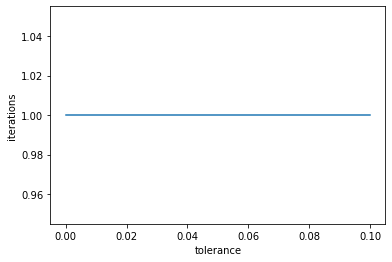

In [17]:
plt.plot(my_tol_list,my_itr_list)
plt.xlabel('Tolerance')
plt.ylabel('Iterations')
plt.show()

$\text{From this plot we can observe that the number of iteration is remaining same(only 1) for different} \\ \text{ tolerance values. but in the exercise 1 for fixed steplength the number of iterations} \\ \text{ was changing for different tolerance values.}$